# **Chapter 1: The Machine Learning Landscape**

## Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

This project requires Python 3.7 or above:

In [2]:
import sys

assert sys.version_info >= (3, 7)

Scikit-Learn ≥1.0.1 is required:

In [3]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

Let's define the default font sizes, to plot pretty figures:

In [4]:
plt.rc("font", size=12)
plt.rc("axes", labelsize=13, titlesize=14)
plt.rc("legend", fontsize=12)
plt.rc("xtick", labelsize=10)
plt.rc("ytick", labelsize=10)

Make this notebook's output stable across runs:

In [5]:
np.random.seed(99)

### Code Example 1-1

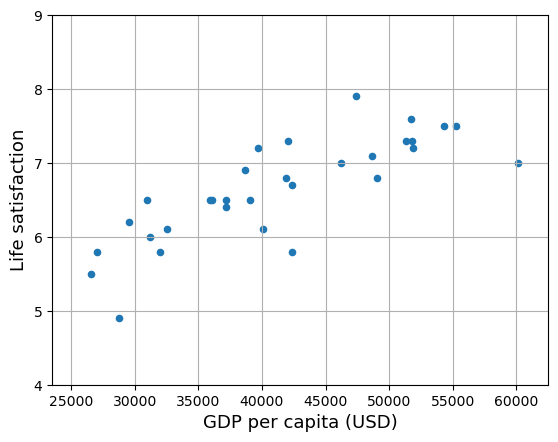

[[6.43586596]]


In [6]:
# Download and prepare the data
data_root = "https://github.com/ageron/data/raw/main/"
# lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
lifesat = pd.read_csv("datasets/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize the data
lifesat.plot(
    kind="scatter",
    x="GDP per capita (USD)",
    y="Life satisfaction",
    grid=True
)
plt.axis([23_500, 62_500, 4, 9])
plt.show()

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_665.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new))

In [7]:
# Select a 3-nearest neighbors regression model
model = KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
print(model.predict(X_new))

[[6.6]]


### Generating the data and figures

Create a function to save the figures:

In [8]:
from pathlib import Path

# Where to save the figures
IMAGES_PATH = Path() / "images" / "fundamentals"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Load and prepare Life satisfaction data

In [9]:
oecd_bli = pd.read_csv("datasets/oecd-df-bli-all.csv")
gdp_per_capita = pd.read_csv("datasets/gdp-per-capita-worldbank.csv")

In [10]:
gdp_year = 2020
gdp_col, lifesat_col = "GDP per capita (USD)", "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"]==gdp_year]
gdp_per_capita.drop(columns=["Code", "Year"], inplace=True)
gdp_per_capita.columns = ["Country", gdp_col]
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita

,GDP per capita (USD)
Country,
Afghanistan,1968.3410
Albania,13278.4350
Algeria,10844.7705
Angola,6029.6920
Antigua and Barbuda,19062.4120
...,...
Vanuatu,2848.9702
Vietnam,10450.6210
World,16213.3760


In [11]:
oecd_bli = oecd_bli[oecd_bli['INEQUALITY']=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="OBS_VALUE")
oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,6.7,NaN,84.0,12.5,73.0,67.0,0.9,37433.0,528768.0,19.4,...,55206.0,93.0,NaN,85.0,2.7,499.0,14.36,92.0,92.0,20.0
Austria,12.2,0.8,86.0,5.3,72.0,86.0,0.5,37001.0,309637.0,20.8,...,53132.0,92.0,1.6,71.0,1.3,491.0,14.51,76.0,92.0,17.0
Belgium,12.8,0.7,80.0,4.3,65.0,56.0,1.1,34884.0,447607.0,20.0,...,54327.0,90.0,2.1,74.0,2.0,500.0,15.52,88.0,79.0,19.0
Brazil,11.7,6.7,57.0,5.6,57.0,45.0,19.0,NaN,NaN,NaN,...,NaN,83.0,NaN,NaN,2.2,400.0,NaN,80.0,70.0,16.0
Canada,7.1,0.2,92.0,3.3,70.0,78.0,1.2,34421.0,478240.0,22.9,...,55342.0,93.0,2.6,89.0,2.9,517.0,14.57,68.0,90.0,17.0


In [12]:
oecd_bli_lifesat = oecd_bli[["Life satisfaction"]]
oecd_bli_lifesat.head()

Indicator,Life satisfaction
Country,
Australia,7.1
Austria,7.2
Belgium,6.8
Brazil,6.1
Canada,7.0


In [13]:
oecd_bli_lifesat.rename(
    index={"Korea": "South Korea", "Slovak Republic": "Slovakia", "Türkiye": "Turkey"},
    inplace=True
)

full_country_stats = pd.merge(
    left=gdp_per_capita,
    right=oecd_bli_lifesat,
    left_index=True,
    right_index=True
)

full_country_stats.sort_values(by=gdp_col, inplace=True)
full_country_stats.head()

/tmp/ipykernel_62554/2529292046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oecd_bli_lifesat.rename(


,GDP per capita (USD),Life satisfaction
Country,,
South Africa,12866.569,4.9
Colombia,13358.298,5.7
Brazil,14109.764,6.1
Mexico,18639.662,6.0
Costa Rica,19778.387,6.3


In [14]:
min_gdp = 23_500
max_gdp = 62_500

# country_stats =
mask = (full_country_stats[gdp_col] >= 23_500) & (full_country_stats[gdp_col] <= max_gdp)
country_stats = full_country_stats[mask]
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26586.555,5.5
Greece,27009.207,5.8
Turkey,28726.191,4.9
Latvia,29575.568,6.2
Slovakia,30960.959,6.5


In [15]:
annot_pts = ["Turkey", "Hungary", "New Zealand", "France", "Denmark", "United States", "Australia"]
highlighted_countries = country_stats.loc[annot_pts].copy()
highlighted_countries.sort_values(by=gdp_col, inplace=True)
highlighted_countries

,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28726.191,4.9
Hungary,31232.102,6.0
New Zealand,42052.140,7.3
France,42344.945,6.7
Australia,48651.734,7.1
Denmark,55275.062,7.5
United States,60158.910,7.0


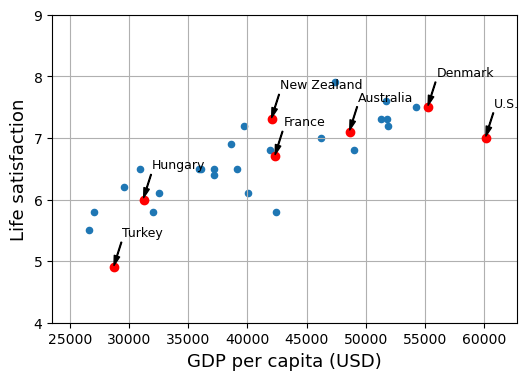

In [154]:
min_life_sat = 4
max_life_sat = 9

country_stats.plot(
    figsize=(6, 4),
    kind="scatter",
    x=gdp_col,
    y=lifesat_col,
    grid=True
)

for country in country_stats.index:
    if country not in annot_pts:
        continue
    plt.annotate(
        text="U.S." if country == "United States" else country,
        xy=country_stats.loc[country]+0.03,
        xytext=(country_stats.loc[country].iloc[0]+700,
                country_stats.loc[country].iloc[1]+0.5),
        fontsize=9,
        arrowprops=dict(facecolor='black', headlength=7, headwidth=4, width=0.5)
    )
    plt.scatter(x=country_stats.loc[country].iloc[0],
                y=country_stats.loc[country].iloc[1],
                c="r", zorder=2)

plt.axis([min_gdp, max_gdp+300, min_life_sat, max_life_sat])
plt.show()

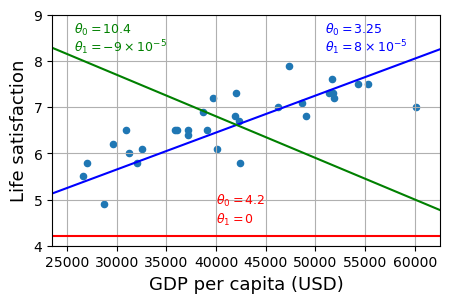

In [155]:
country_stats.plot(
    figsize=(5, 3),
    kind="scatter",
    x=gdp_col,
    y=lifesat_col,
    grid=True
)

X = np.linspace(min_gdp, max_gdp, 1000)

# Blue line
w, b = 8 * 1e-5, 3.25
plt.plot(X, X * w + b, 'b')
plt.text(51_000, 8.6, r"$\theta_0=3.25$", c='b', size=9)
plt.text(51_000, 8.2, r"$\theta_1=8 \times 10^{-5}$", c='b', size=9)

# Green line
w, b = -9 * 1e-5, 10.4
plt.plot(X, X * w + b, 'g')
plt.text(25_700, 8.6, r"$\theta_0=10.4$", c='g', size=9)
plt.text(25_700, 8.2, r"$\theta_1=-9 \times 10^{-5}$", c='g', size=9)

# Red line
w, b = 0 * 1e-5, 4.2
plt.plot(X, X * w + b, 'r')
plt.text(40_000, 4.9, r"$\theta_0=4.2$", c='r', size=9)
plt.text(40_000, 4.5, r"$\theta_1=0$", c='r', size=9)

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
plt.show()

In [21]:
country_stats

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26586.555,5.5
Greece,27009.207,5.8
Turkey,28726.191,4.9
Latvia,29575.568,6.2
Slovakia,30960.959,6.5
Hungary,31232.102,6.0
Portugal,32011.324,5.8
Poland,32546.826,6.1
Estonia,35883.266,6.5


In [157]:
X_sample = country_stats[[gdp_col]].values
y_sample = country_stats[lifesat_col].values

lin_reg = LinearRegression()
lin_reg.fit(X_sample, y_sample)

w, b = lin_reg.coef_[0], lin_reg.intercept_
print(f"w={w:.3e}, b={b:.3f}")

w=6.023e-05, b=4.167


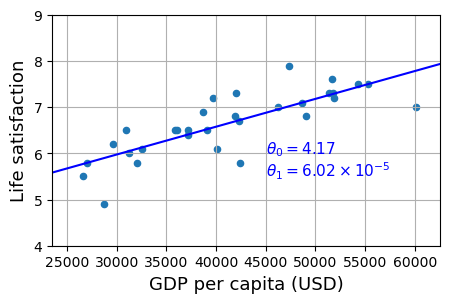

In [158]:
country_stats.plot(
    kind="scatter",
    x=gdp_col,
    y=lifesat_col,
    figsize=(5, 3),
    grid=True
)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, w * X + b, c='b')

plt.text(x=45_000, y=6, s=fr"$\theta_0={b:.2f}$", c='b', size=11)
plt.text(x=45_000, y=5.5, s=fr"$\theta_1={w * 1e+5:.2f} \times 10^{{-5}}$", c='b', size=11)

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
plt.show()

In [161]:
cyprus_gdp = 37_665.2
# make prediction